# Stocks A1 - AMZN

## Submission 2

### Loading Data and Libraries

In [49]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers.legacy import SGD, Adam

In [50]:
data = pd.read_csv("AMZN_2006-01-01_to_2018-01-01.csv")

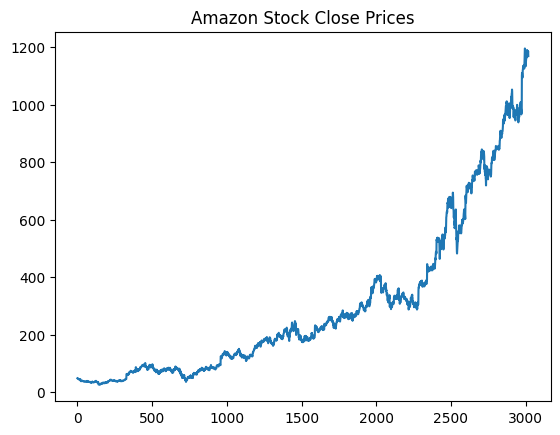

In [51]:
series = data['Close'].values.astype(np.float32)
plt.plot(series)
plt.title("Amazon Stock Close Prices")
plt.show()

### Initial Model

In [52]:
mean = np.mean(series)
std = np.std(series)
series = (series - mean) / std

In [53]:
T = 10  # number of past days to use for predicting next day
X, Y = [], []
for t in range(len(series) - T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)

In [54]:
# Try autoregressive model
N = len(X)
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i, x)
model.compile(
    loss='mse',
    optimizer=Adam(learning_rate=0.1)
)

# train 
r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs=80,
    validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/80
47/47 [==============================] - 0s 4ms/step - loss: 0.0335 - val_loss: 0.0035
Epoch 2/80
47/47 [==============================] - 0s 2ms/step - loss: 7.7851e-04 - val_loss: 0.0037
Epoch 3/80
47/47 [==============================] - 0s 2ms/step - loss: 3.9249e-04 - val_loss: 0.0034
Epoch 4/80
47/47 [==============================] - 0s 2ms/step - loss: 4.3416e-04 - val_loss: 0.0033
Epoch 5/80
47/47 [==============================] - 0s 2ms/step - loss: 3.5719e-04 - val_loss: 0.0029
Epoch 6/80
47/47 [==============================] - 0s 2ms/step - loss: 3.4908e-04 - val_loss: 0.0027
Epoch 7/80
47/47 [==============================] - 0s 2ms/step - loss: 2.9451e-04 - val_loss: 0.0029
Epoch 8/80
47/47 [==============================] - 0s 2ms/step - loss: 3.4867e-04 - val_loss: 0.0028
Epoch 9/80
47/47 [==============================] - 0s 2ms/step - loss: 2.6812e-04 - val_loss: 0.0024
Epoch 10/80
47/47 [==============================] - 0s 2ms/step - loss: 2.6284e-04 - 

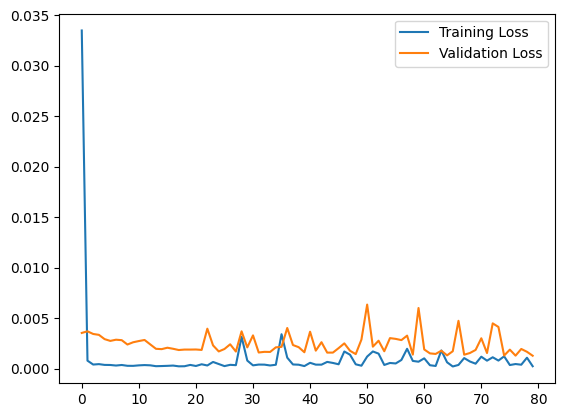

In [55]:
plt.plot(r.history['loss'], label='Training Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

### Evaluation

In [56]:
# Forecast future values
validation_target = Y[-N//2:]
validation_predictions = []

# Last train input
last_x = X[-N//2]

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1))[0, 0] # 1x1 array
  
  # Update predictions list
  validation_predictions.append(p)

  # Make the new input
  last_x = np.roll(last_x, -1) # shift everything one spot to the left, we replace it with the latest forecasted prediction. Multi-step predictions.
  last_x[-1] = p

1/1 [==============================] - 0s 16ms/step


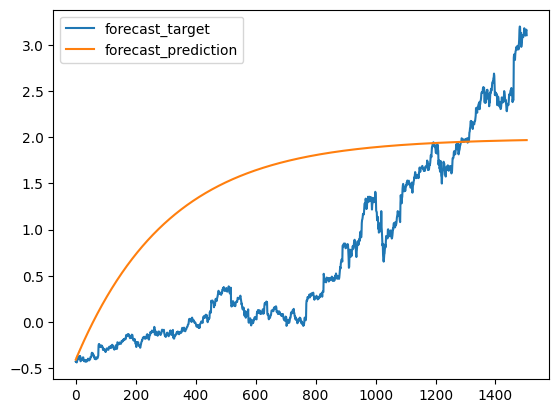

In [57]:
plt.plot(validation_target, label="forecast_target")
plt.plot(validation_predictions, label="forecast_prediction")
plt.legend()